# 라이브러리 불러오기

In [15]:
import pandas as pd
import numpy as np
from datetime import timedelta
from datetime import datetime
import statistics as st
from bs4 import BeautifulSoup as bs
import requests

import FinanceDataReader as fdr
from pykrx import stock

import matplotlib.pyplot as plt
import koreanize_matplotlib

In [16]:
import warnings
warnings.filterwarnings('ignore')

In [17]:
# fdr.StockListing?
# fdr.DataReader??

# 데이터셋 불러오기

In [18]:
# 주가정보 데이터셋

df_krx = fdr.StockListing("KRX")
df_kospi = fdr.StockListing("KOSPI")

In [19]:
df_krx.shape

(8062, 10)

In [20]:
df_kospi.shape

(6344, 10)

## 종목 제거해주기

```
NaN값이 들어가 있는 상품들은 모두 제거.
ETF, ELW, 파생, 우선주 등이 포함되어 있어서 모두 제거
우선주도 NaN값을 채워져있었기에 편의성을 위해 같이 제거해 준다.
흔히 알고있는 주식 종목만으로 진행
```

In [21]:
df_krx.head(50)

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
0,060310,KOSDAQ,3S,전자부품 제조업,반도체 웨이퍼 캐리어,2002-04-23,03월,김세완,http://www.3sref.com,서울특별시
1,095570,KOSPI,AJ네트웍스,산업용 기계 및 장비 임대업,"렌탈(파렛트, OA장비, 건설장비)",2015-08-21,12월,"박대현, 손삼달",http://www.ajnet.co.kr,서울특별시
2,006840,KOSPI,AK홀딩스,기타 금융업,지주사업,1999-08-11,12월,"채형석, 이석주(각자 대표이사)",http://www.aekyunggroup.co.kr,서울특별시
3,054620,KOSDAQ,APS홀딩스,기타 금융업,인터넷 트래픽 솔루션,2001-12-04,12월,정기로,http://www.apsholdings.co.kr,경기도
4,265520,KOSDAQ,AP시스템,특수 목적용 기계 제조업,디스플레이 제조 장비,2017-04-07,12월,김영주,http://www.apsystems.co.kr,경기도
5,211270,KOSDAQ,AP위성,통신 및 방송 장비 제조업,위성통신 단말기,2016-03-04,12월,류장수,http://www.apsi.co.kr,서울특별시
6,152100,KOSPI,ARIRANG 200,NaN,NaN,NaT,NaN,NaN,NaN,NaN
7,295820,KOSPI,ARIRANG 200동일가중,NaN,NaN,NaT,NaN,NaN,NaN,NaN
8,253150,KOSPI,ARIRANG 200선물레버리지,NaN,NaN,NaT,NaN,NaN,NaN,NaN
9,253160,KOSPI,ARIRANG 200선물인버스2X,NaN,NaN,NaT,NaN,NaN,NaN,NaN


In [22]:
df_krx = df_krx.dropna(axis=0).reset_index(drop=True)
display(df_krx.head(10))
df_krx.shape

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
0,060310,KOSDAQ,3S,전자부품 제조업,반도체 웨이퍼 캐리어,2002-04-23,03월,김세완,http://www.3sref.com,서울특별시
1,095570,KOSPI,AJ네트웍스,산업용 기계 및 장비 임대업,"렌탈(파렛트, OA장비, 건설장비)",2015-08-21,12월,"박대현, 손삼달",http://www.ajnet.co.kr,서울특별시
2,006840,KOSPI,AK홀딩스,기타 금융업,지주사업,1999-08-11,12월,"채형석, 이석주(각자 대표이사)",http://www.aekyunggroup.co.kr,서울특별시
3,054620,KOSDAQ,APS홀딩스,기타 금융업,인터넷 트래픽 솔루션,2001-12-04,12월,정기로,http://www.apsholdings.co.kr,경기도
4,265520,KOSDAQ,AP시스템,특수 목적용 기계 제조업,디스플레이 제조 장비,2017-04-07,12월,김영주,http://www.apsystems.co.kr,경기도
5,211270,KOSDAQ,AP위성,통신 및 방송 장비 제조업,위성통신 단말기,2016-03-04,12월,류장수,http://www.apsi.co.kr,서울특별시
6,027410,KOSPI,BGF,기타 금융업,지주회사,2014-05-19,12월,홍정국,http://www.bgf.co.kr,서울특별시
7,282330,KOSPI,BGF리테일,종합 소매업,체인화 편의점,2017-12-08,12월,이건준,http://www.bgfretail.com,서울특별시
8,032790,KOSDAQ,BNGT,기계장비 및 관련 물품 도매업,"Bio 이종장기 사업, ICT 프린터 현상기",1997-06-26,12월,조상환,http://www.mgenplus.com,서울특별시
9,138930,KOSPI,BNK금융지주,기타 금융업,금융지주회사,2011-03-30,12월,김지완,http://www.bnkfg.com,부산광역시


(2354, 10)

In [23]:
df_kospi = df_kospi.dropna(axis=0).reset_index(drop=True)
display(df_kospi.head(10))
df_kospi.shape

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
0,095570,KOSPI,AJ네트웍스,산업용 기계 및 장비 임대업,"렌탈(파렛트, OA장비, 건설장비)",2015-08-21,12월,"박대현, 손삼달",http://www.ajnet.co.kr,서울특별시
1,006840,KOSPI,AK홀딩스,기타 금융업,지주사업,1999-08-11,12월,"채형석, 이석주(각자 대표이사)",http://www.aekyunggroup.co.kr,서울특별시
2,027410,KOSPI,BGF,기타 금융업,지주회사,2014-05-19,12월,홍정국,http://www.bgf.co.kr,서울특별시
3,282330,KOSPI,BGF리테일,종합 소매업,체인화 편의점,2017-12-08,12월,이건준,http://www.bgfretail.com,서울특별시
4,138930,KOSPI,BNK금융지주,기타 금융업,금융지주회사,2011-03-30,12월,김지완,http://www.bnkfg.com,부산광역시
5,001460,KOSPI,BYC,봉제의복 제조업,"메리야스,란제리 제조,도매/건축공사/부동산 임대,분양,공급",1975-06-02,12월,김 대 환,http://home.byc.co.kr,서울특별시
6,001040,KOSPI,CJ,기타 금융업,지주회사,1973-06-29,12월,"손경식, 김홍기",http://www.cj.net,서울특별시
7,079160,KOSPI,CJ CGV,"영화, 비디오물, 방송프로그램 제작 및 배급업","영화상영,영화관 운영",2004-12-24,12월,허민회,http://www.cgv.co.kr,서울특별시
8,000120,KOSPI,CJ대한통운,도로 화물 운송업,"Contract Logistics, 포워딩, 항만하역, 해운, 택배국제특송, SCM...",1956-07-02,12월,"강신호,민영학(각자대표)",http://www.cjlogistics.com,서울특별시
9,011150,KOSPI,CJ씨푸드,기타 식품 제조업,"수산물(어묵,맛살)가공품 도매,원양수산업,수출입",1988-11-26,12월,"이인덕, 김정웅 (각자대표)",http://www.cjseafood.net,경기도


(786, 10)

In [24]:
# 종목명입력하면 종목 코드와 시장 반환해 주는 함수

def find_history_krx(name):
    info_list = []
    
    
    code = df_krx.loc[df_krx["Name"] == name, "Symbol"].values[0]
    market = df_krx.loc[df_krx["Name"] == name, "Market"].values[0]
    info_list.append(name)
    info_list.append(code)
    info_list.append(market)
    
    return info_list

item_info = find_history_krx("LG화학")
item_info

['LG화학', '051910', 'KOSPI']

# 필요한 지표 구하기

## 무위험이자율, 시장수익률, 베타

In [25]:
# 무위험 이자율 
# CD 91물 16년 1월 ~ 22년 연평균 수익률 (22년은 6월까지의 지표를 산술평균)
# 단위 : %

rf = 1.51

In [26]:
# 시장수익률
# 2016년 ~ 2022년 (연간) 22년은 모두 집계가 되지 않았기 때문에 7월로 대체
# 연평균 수익률 CAGR 사용
rm_kospi = 3.22
rm_kosdaq = 4.10

In [27]:
# 베타
response = requests.get("https://navercomp.wisereport.co.kr/v2/company/c1010001.aspx?cmp_cd=035720&cn=")
html = bs(response.text, "lxml")
tmp = html.select("#cTB11 > tbody > tr:nth-child(6) > td")
float(str(tmp[0]).split()[2])

1.44

In [28]:
# 베타 추출 함수

def get_beta(code):
    response = requests.get(f"https://navercomp.wisereport.co.kr/v2/company/c1010001.aspx?cmp_cd={code}&cn=")
    html = bs(response.text, "lxml")
    tmp = html.select("#cTB11 > tbody > tr:nth-child(6) > td")
    
    
    return float(str(tmp[0]).split()[2])

get_beta(item_info[1])

1.07

## 기대수익률, 표준편차

In [29]:
# 종목 기대수익률


def expected_return(rm, rf, beta):
    return np.round(rf + beta * (rm - rf), 2)

expected_return(rm_kospi, rf, get_beta(item_info[1]))

3.34

In [30]:
# 종목 표준편차
def get_std(code):
    df = fdr.DataReader(code, "2016")["Close"]
    return np.std(df)

get_std("375500")

9385.394961408065

## 공분산, 상관계수

In [32]:
# 종목 공분산

def get_cov(code1, code2):
    df1 = fdr.DataReader(code1, "2016")["Close"]
    df2 = fdr.DataReader(code2, "2016")["Close"]
    if len(df1) != len(df2):
        if len(df1) > len(df2):
            df1 = fdr.DataReader(code1, df2.index[0])["Close"]
        else:
            df2 = fdr.DataReader(code1, df1.index[0])["Close"]
    return np.cov(df1, df2)[0][1]

get_cov(item_info[1], "375500")

723047370.741096

In [34]:
def get_corr(code1, code2):
    cov = get_cov(code1, code2)
    return cov / (get_std(code1) * get_std(code2))

get_corr(item_info[1], "375500")

0.3784229544111321

## 고른 종목의 기대수익률, 표준편차

In [37]:
input_item = []
input_item.append(expected_return(rm_kospi, rf, get_beta(item_info[1])))
input_item.append(get_std(item_info[1]))
input_item

[3.34, 203586.1028253075]

## fundamental 지표로 종목 고르기

In [38]:
# fundamental 지표로 종목 정하기
# PER, PBR, EPS, DIV, DPS, BPS
# PER, PBR이 낮을 수록 저평가 돼어있다는 의미
# 나머지 지표는 높을 수록 good


df_per = stock.get_market_fundamental(datetime.today() - timedelta(1), market="ALL")
df_per["Ticker"] = df_per.index
df_per = df_per.reset_index(drop=True)
df_per

,BPS,PER,PBR,EPS,DIV,DPS,Ticker
0,792,182.19,3.68,16,0.00,0,060310
1,8075,4.67,0.99,1707,3.38,270,095570
2,45961,0.00,0.37,0,1.19,200,006840
3,10088,9.46,1.11,1179,0.90,100,054620
4,12713,4.76,1.47,3932,1.28,240,265520
...,...,...,...,...,...,...,...
2463,0,0.00,0.00,0,0.00,0,000547
2464,0,0.00,0.00,0,0.00,0,000545
2465,428,15.38,4.24,118,0.00,0,003280
2466,4769,18.69,1.92,490,1.64,150,037440


In [39]:
# 종목명 넣기 이거 뭐 필요하면 그 때 하기

In [40]:
# 0값 제외

BPS = df_per['BPS'] > 0
PER = df_per['PER'] > 0
PBR = df_per['PBR'] > 0
EPS = df_per['EPS'] > 0
DIV = df_per['DIV'] > 0
DPS = df_per['DPS'] > 0

df_per = df_per[BPS & PER & PBR & EPS & DIV & DPS]
df_per

,BPS,PER,PBR,EPS,DIV,DPS,Ticker
1,8075,4.67,0.99,1707,3.38,270,095570
3,10088,9.46,1.11,1179,0.90,100,054620
4,12713,4.76,1.47,3932,1.28,240,265520
5,5714,118.18,2.05,99,0.60,70,211270
6,16393,6.21,0.26,684,2.59,110,027410
...,...,...,...,...,...,...,...
2457,43390,71.43,0.53,322,2.17,500,084110
2459,5426,66.04,1.17,96,1.58,100,024060
2460,7439,6.85,0.95,1027,2.84,200,010240
2461,2004,21.07,1.72,164,0.87,30,189980


In [41]:
# per 순위 매기기

df_per = df_per.sort_values(by="PER", ascending=True).reset_index(drop=True)
df_per["per_rank"] = df_per.index
df_per

,BPS,PER,PBR,EPS,DIV,DPS,Ticker,per_rank
0,49495,0.23,0.41,88031,0.84,170,007700,0
1,78914,1.41,0.31,17601,3.23,800,013580,1
2,91007,1.55,0.30,17743,5.09,1400,005810,2
3,194338,1.61,0.22,26903,6.22,2700,375500,3
4,173922,1.61,0.39,41881,2.82,1900,000210,4
...,...,...,...,...,...,...,...,...
1070,2053,404.29,2.76,14,0.88,50,089150,1070
1071,4273,459.09,1.18,11,1.09,55,001420,1071
1072,8124,585.90,2.81,39,0.13,30,290720,1072
1073,17171,594.35,6.13,177,0.48,500,237690,1073


In [42]:
# pbr 순위 매기기

df_per = df_per.sort_values(by="PBR", ascending=True).reset_index(drop=True)
df_per["pbr_rank"] = df_per.index
df_per

,BPS,PER,PBR,EPS,DIV,DPS,Ticker,per_rank,pbr_rank
0,43552,3.41,0.16,2069,3.54,250,012630,90,0
1,197979,5.12,0.17,6714,2.18,750,012320,192,1
2,660594,5.11,0.17,21701,0.68,750,003830,191,2
3,44548,3.26,0.18,2478,0.31,25,021820,79,3
4,4626787,2.33,0.19,377488,0.20,1750,003240,28,4
...,...,...,...,...,...,...,...,...,...
1070,8721,56.49,9.98,1540,0.11,100,078600,1004,1070
1071,9322,132.43,9.99,703,0.13,120,121600,1056,1071
1072,14307,24.67,10.45,6061,0.74,1100,383220,886,1072
1073,4101,81.62,14.95,751,0.54,330,383310,1033,1073


In [43]:
# eps 순위 매기기

df_per = df_per.sort_values(by="EPS", ascending=False).reset_index(drop=True)
df_per["eps_rank"] = df_per.index
df_per

,BPS,PER,PBR,EPS,DIV,DPS,Ticker,per_rank,pbr_rank,eps_rank
0,4626787,2.33,0.19,377488,0.20,1750,003240,28,4,0
1,329152,1.84,1.00,178503,15.20,50000,298020,12,552,1
2,157641,2.33,1.64,110854,0.20,511,035420,29,799,2
3,49495,0.23,0.41,88031,0.84,170,007700,0,128,3
4,666803,2.95,0.39,87330,6.59,17000,005490,56,111,4
...,...,...,...,...,...,...,...,...,...,...
1070,2053,404.29,2.76,14,0.88,50,089150,1070,969,1070
1071,1997,257.69,1.68,13,1.04,35,047400,1066,803,1071
1072,4273,459.09,1.18,11,1.09,55,001420,1071,646,1072
1073,835,189.17,1.36,6,0.88,10,002360,1063,717,1073


In [44]:
# DIV 순위 매기기

df_per = df_per.sort_values(by="DIV", ascending=False).reset_index(drop=True)
df_per["div_rank"] = df_per.index
df_per

,BPS,PER,PBR,EPS,DIV,DPS,Ticker,per_rank,pbr_rank,eps_rank,div_rank
0,1797,19.97,6.46,581,20.69,2400,366030,822,1061,736,0
1,5260,15.05,3.31,1156,15.63,2720,092130,698,1008,519,1
2,329152,1.84,1.00,178503,15.20,50000,298020,12,552,1,2
3,5770,3.44,0.98,1642,13.27,750,352700,91,538,429,3
4,19530,3.14,0.28,1768,11.15,620,082640,71,29,412,4
...,...,...,...,...,...,...,...,...,...,...,...
1070,8721,56.49,9.98,1540,0.11,100,078600,1004,1070,445,1070
1071,1695,101.76,5.46,91,0.11,10,307750,1049,1049,1035,1071
1072,2679,65.98,6.01,244,0.09,15,093370,1020,1054,935,1072
1073,23018,24.87,3.48,3221,0.07,53,035720,888,1019,273,1073


In [45]:
# DPS 순위 매기기

df_per = df_per.sort_values(by="DPS", ascending=False).reset_index(drop=True)
df_per["dps_rank"] = df_per.index
df_per

,BPS,PER,PBR,EPS,DIV,DPS,Ticker,per_rank,pbr_rank,eps_rank,div_rank,dps_rank
0,329152,1.84,1.00,178503,15.20,50000,298020,12,552,1,2,0
1,430439,13.08,1.39,45648,3.35,20000,010130,628,725,14,225,1
2,84273,11.37,3.01,22343,7.48,19000,002960,547,993,40,29,2
3,666803,2.95,0.39,87330,6.59,17000,005490,56,111,4,40,3
4,321556,14.41,2.26,50395,1.65,12000,051900,678,918,11,568,4
...,...,...,...,...,...,...,...,...,...,...,...,...
1070,712,33.18,2.05,44,0.68,10,020180,948,880,1063,923,1070
1071,1177,23.49,2.91,146,0.20,7,068330,870,983,1000,1058,1071
1072,1617,12.16,1.20,160,0.26,5,014910,587,654,992,1051,1072
1073,760,62.86,2.32,28,0.28,5,002760,1016,922,1069,1048,1073


In [46]:
# BPS 순위 매기기

df_per = df_per.sort_values(by="BPS", ascending=False).reset_index(drop=True)
df_per["bps_rank"] = df_per.index
df_per

,BPS,PER,PBR,EPS,DIV,DPS,Ticker,per_rank,pbr_rank,eps_rank,div_rank,dps_rank,bps_rank
0,4626787,2.33,0.19,377488,0.20,1750,003240,28,4,0,1056,102,0
1,2011831,8.41,0.30,72187,1.65,10000,000670,386,44,5,567,8,1
2,666803,2.95,0.39,87330,6.59,17000,005490,56,111,4,40,3,2
3,660594,5.11,0.17,21701,0.68,750,003830,191,2,43,921,219,3
4,577324,11.62,0.72,35764,0.36,1500,001460,563,395,22,1026,114,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1070,835,189.17,1.36,6,0.88,10,002360,1063,717,1073,837,1065,1070
1071,835,22.89,1.56,57,1.53,20,273060,862,780,1053,601,1047,1071
1072,760,62.86,2.32,28,0.28,5,002760,1016,922,1069,1048,1073,1072
1073,712,33.18,2.05,44,0.68,10,020180,948,880,1063,923,1070,1073


In [47]:
# 합산 점수가 가장 낮을 수록 높은 순위
# 리스트로 반환

df_per["total_rank"] = df_per["bps_rank"] + df_per["per_rank"] + df_per["pbr_rank"] + df_per["eps_rank"] + df_per["div_rank"] + df_per["dps_rank"]
df_sorted = df_per.sort_values(by="total_rank", ascending=True).reset_index(drop=True).head(50)
df_sorted

,BPS,PER,PBR,EPS,DIV,DPS,Ticker,per_rank,pbr_rank,eps_rank,div_rank,dps_rank,bps_rank,total_rank
0,194338,1.61,0.22,26903,6.22,2700,375500,3,11,32,47,61,44,198
1,666803,2.95,0.39,87330,6.59,17000,005490,56,111,4,40,3,2,216
2,226210,2.01,0.20,22789,4.80,2200,017940,16,7,38,94,78,32,265
3,126688,2.05,0.49,30208,9.92,6150,071050,17,196,27,7,15,72,334
4,117363,3.32,0.33,11819,7.90,3100,086790,82,62,77,23,42,80,366
5,226314,2.41,0.33,30711,4.05,3000,000070,32,70,26,156,52,31,367
6,91007,1.55,0.30,17743,5.09,1400,005810,2,42,54,79,125,98,400
7,74017,2.59,0.30,8672,7.13,1600,001270,37,40,115,33,107,126,458
8,420424,4.69,0.44,39260,4.51,8300,011170,170,151,17,114,10,11,473
9,208904,5.24,0.29,11573,4.95,3000,092230,205,35,81,85,43,37,486


In [48]:
df_per

,BPS,PER,PBR,EPS,DIV,DPS,Ticker,per_rank,pbr_rank,eps_rank,div_rank,dps_rank,bps_rank,total_rank
0,4626787,2.33,0.19,377488,0.20,1750,003240,28,4,0,1056,102,0,1190
1,2011831,8.41,0.30,72187,1.65,10000,000670,386,44,5,567,8,1,1011
2,666803,2.95,0.39,87330,6.59,17000,005490,56,111,4,40,3,2,216
3,660594,5.11,0.17,21701,0.68,750,003830,191,2,43,921,219,3,1379
4,577324,11.62,0.72,35764,0.36,1500,001460,563,395,22,1026,114,4,2124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1070,835,189.17,1.36,6,0.88,10,002360,1063,717,1073,837,1065,1070,5825
1071,835,22.89,1.56,57,1.53,20,273060,862,780,1053,601,1047,1071,5414
1072,760,62.86,2.32,28,0.28,5,002760,1016,922,1069,1048,1073,1072,6200
1073,712,33.18,2.05,44,0.68,10,020180,948,880,1063,923,1070,1073,5957


## 상관계수 구하기

In [49]:
df_sorted

,BPS,PER,PBR,EPS,DIV,DPS,Ticker,per_rank,pbr_rank,eps_rank,div_rank,dps_rank,bps_rank,total_rank
0,194338,1.61,0.22,26903,6.22,2700,375500,3,11,32,47,61,44,198
1,666803,2.95,0.39,87330,6.59,17000,005490,56,111,4,40,3,2,216
2,226210,2.01,0.20,22789,4.80,2200,017940,16,7,38,94,78,32,265
3,126688,2.05,0.49,30208,9.92,6150,071050,17,196,27,7,15,72,334
4,117363,3.32,0.33,11819,7.90,3100,086790,82,62,77,23,42,80,366
5,226314,2.41,0.33,30711,4.05,3000,000070,32,70,26,156,52,31,367
6,91007,1.55,0.30,17743,5.09,1400,005810,2,42,54,79,125,98,400
7,74017,2.59,0.30,8672,7.13,1600,001270,37,40,115,33,107,126,458
8,420424,4.69,0.44,39260,4.51,8300,011170,170,151,17,114,10,11,473
9,208904,5.24,0.29,11573,4.95,3000,092230,205,35,81,85,43,37,486


In [52]:
corr = []
for ticker in df_sorted["Ticker"]:
    corr.append(get_corr(item_info[1], ticker))
# df_sorted["corr_rank"] = corr
# df_sorted = df_sorted.sort_values(by="corr", ascending=False).reset_index(drop=True)
# df_sorted["corr_rank"] = df_sorted.index
# df_sorted

In [53]:
df_sorted['corr'] = corr
df_sorted = df_sorted.sort_values(by="corr", ascending=True).reset_index(drop=True)
df_sorted["corr_rank"] = df_sorted.index
df_sorted

,BPS,PER,PBR,EPS,DIV,DPS,Ticker,per_rank,pbr_rank,eps_rank,div_rank,dps_rank,bps_rank,total_rank,corr,corr_rank
0,363848,7.50,0.54,26399,6.06,12000,000810,347,239,34,50,6,19,695,-0.665505,0
1,99889,3.33,0.33,9845,4.57,1500,029530,84,74,100,109,120,91,578,-0.638273,1
2,164432,5.83,0.32,8881,4.63,2400,057050,240,57,111,106,70,51,635,-0.592198,2
3,140307,2.64,0.36,19026,3.98,2000,009970,39,89,50,164,92,61,495,-0.585296,3
4,108672,2.86,0.40,15304,4.57,2000,078930,52,117,62,111,88,86,516,-0.574181,4
5,93727,5.22,0.37,6584,4.94,1700,037710,201,95,144,86,104,95,725,-0.518735,5
6,223666,6.51,0.31,10581,2.90,2000,072710,283,51,91,287,90,34,836,-0.517894,6
7,70408,6.17,0.45,5164,7.22,2300,029780,261,156,187,32,72,129,837,-0.506529,7
8,110605,4.33,0.57,14482,5.58,3500,005830,149,273,64,66,38,84,674,-0.489202,8
9,88548,4.93,0.41,7308,5.44,1960,055550,178,125,133,68,95,103,702,-0.466471,9


In [54]:
# 상위 5개 종목

df_sorted["total_rank"] = df_sorted["total_rank"] + df_sorted["corr_rank"]
df_sorted = df_sorted.sort_values(by="total_rank", ascending=True).reset_index(drop=True).head(50)
df_sorted

,BPS,PER,PBR,EPS,DIV,DPS,Ticker,per_rank,pbr_rank,eps_rank,div_rank,dps_rank,bps_rank,total_rank,corr,corr_rank
0,194338,1.61,0.22,26903,6.22,2700,375500,3,11,32,47,61,44,234,0.378423,36
1,666803,2.95,0.39,87330,6.59,17000,005490,56,111,4,40,3,2,249,0.311483,33
2,226210,2.01,0.20,22789,4.80,2200,017940,16,7,38,94,78,32,275,-0.459668,10
3,126688,2.05,0.49,30208,9.92,6150,071050,17,196,27,7,15,72,378,0.689742,44
4,226314,2.41,0.33,30711,4.05,3000,000070,32,70,26,156,52,31,389,-0.197284,22
5,117363,3.32,0.33,11819,7.90,3100,086790,82,62,77,23,42,80,398,0.292867,32
6,91007,1.55,0.30,17743,5.09,1400,005810,2,42,54,79,125,98,417,-0.301014,17
7,420424,4.69,0.44,39260,4.51,8300,011170,170,151,17,114,10,11,491,-0.288163,18
8,74017,2.59,0.30,8672,7.13,1600,001270,37,40,115,33,107,126,493,0.375656,35
9,140307,2.64,0.36,19026,3.98,2000,009970,39,89,50,164,92,61,498,-0.585296,3


In [55]:
Name = []
for i in df_sorted["Ticker"]:
    Name.append(stock.get_market_ticker_name(i))
df_sorted["Name"] = Name
df_sorted

,BPS,PER,PBR,EPS,DIV,DPS,Ticker,per_rank,pbr_rank,eps_rank,div_rank,dps_rank,bps_rank,total_rank,corr,corr_rank,Name
0,194338,1.61,0.22,26903,6.22,2700,375500,3,11,32,47,61,44,234,0.378423,36,DL이앤씨
1,666803,2.95,0.39,87330,6.59,17000,005490,56,111,4,40,3,2,249,0.311483,33,POSCO홀딩스
2,226210,2.01,0.20,22789,4.80,2200,017940,16,7,38,94,78,32,275,-0.459668,10,E1
3,126688,2.05,0.49,30208,9.92,6150,071050,17,196,27,7,15,72,378,0.689742,44,한국금융지주
4,226314,2.41,0.33,30711,4.05,3000,000070,32,70,26,156,52,31,389,-0.197284,22,삼양홀딩스
5,117363,3.32,0.33,11819,7.90,3100,086790,82,62,77,23,42,80,398,0.292867,32,하나금융지주
6,91007,1.55,0.30,17743,5.09,1400,005810,2,42,54,79,125,98,417,-0.301014,17,풍산홀딩스
7,420424,4.69,0.44,39260,4.51,8300,011170,170,151,17,114,10,11,491,-0.288163,18,롯데케미칼
8,74017,2.59,0.30,8672,7.13,1600,001270,37,40,115,33,107,126,493,0.375656,35,부국증권
9,140307,2.64,0.36,19026,3.98,2000,009970,39,89,50,164,92,61,498,-0.585296,3,영원무역홀딩스


In [56]:
# df_sorted['Name'] = stock.get_market_ticker_name(df_sorted["Ticker"])
df_pf = df_sorted[['Ticker','Name', "corr", 'total_rank']]
df_pf

,Ticker,Name,corr,total_rank
0,375500,DL이앤씨,0.378423,234
1,005490,POSCO홀딩스,0.311483,249
2,017940,E1,-0.459668,275
3,071050,한국금융지주,0.689742,378
4,000070,삼양홀딩스,-0.197284,389
5,086790,하나금융지주,0.292867,398
6,005810,풍산홀딩스,-0.301014,417
7,011170,롯데케미칼,-0.288163,491
8,001270,부국증권,0.375656,493
9,009970,영원무역홀딩스,-0.585296,498


## 기대수익률, 표준편차 구하기

In [57]:
pf_return = []
pf_std = []
for j in df_pf["Ticker"]:
    pf_return.append(expected_return(rm_kospi, rf, get_beta(j)))
    pf_std.append(get_std(j))
df_pf["E_return"] = pf_return
df_pf["std"] = pf_std
df_pf

,Ticker,Name,corr,total_rank,E_return,std
0,375500,DL이앤씨,0.378423,234,3.29,9385.148532
1,005490,POSCO홀딩스,0.311483,249,3.73,54733.648161
2,017940,E1,-0.459668,275,2.60,8970.860639
3,071050,한국금융지주,0.689742,378,3.44,17163.889742
4,000070,삼양홀딩스,-0.197284,389,3.49,29660.235789
5,086790,하나금융지주,0.292867,398,2.96,8021.288552
6,005810,풍산홀딩스,-0.301014,417,3.49,5577.844869
7,011170,롯데케미칼,-0.288163,491,3.56,69682.934236
8,001270,부국증권,0.375656,493,2.28,3012.984780
9,009970,영원무역홀딩스,-0.585296,498,2.69,8907.247632


In [58]:
df_pf.columns

Index(['Ticker', 'Name', 'corr', 'total_rank', 'E_return', 'std'], dtype='object')

In [59]:
# LG화학과 DL이앤씨의 투자기회집합

dl_return = df_pf.loc[df_pf["Ticker"] == "375500", "E_return"].values[0]
dl_std = df_pf.loc[df_pf["Ticker"] == "375500", "std"].values[0]
dl_corr = df_pf.loc[df_pf["Ticker"] == "375500", "corr"].values[0]
tmp_return = []
tmp_std = []
for x in range(10000):
    weights = np.random.random(2)
    weights /= np.sum(weights)  # 가중치 합 1
    
    p_return = (weights[0] * input_item[0]) + (weights[1] * dl_return)
    p_std = (weights[0] ** 2) * (input_item[1] ** 2) + (weights[1] ** 2) * (dl_std ** 2) + (2 * weights[0] * weights[1] * dl_corr * input_item[1] * dl_std)
    
    tmp_return.append(p_return)
    tmp_std.append(p_std)

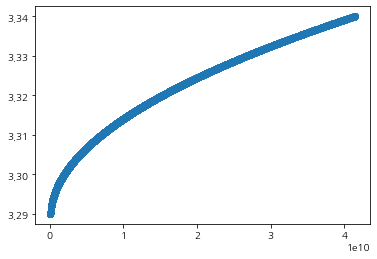

In [60]:
plt.scatter(tmp_std, tmp_return)
plt.show()

In [61]:
def portfolio_return(w1, r1, r2):
    return (w1 * r1) + ((1 - w1) * r2)

def portfolio_std(w1, std1, std2, corr):
    return (w1 ** 2) * (std1 ** 2) + ((1 - w1) ** 2) * (std2 ** 2) + (2 * w1 * (1 - w1) * corr * std1 * std2)

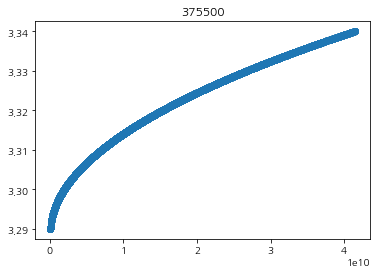

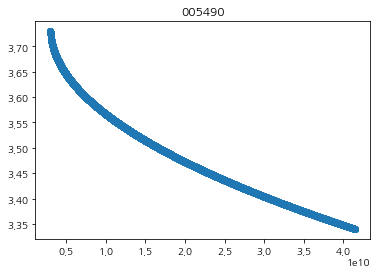

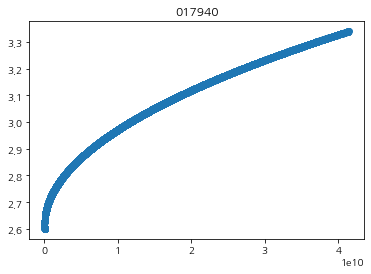

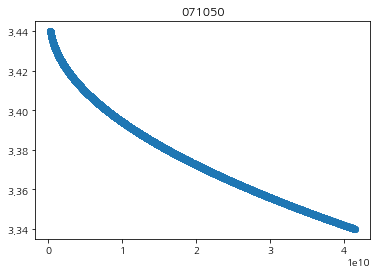

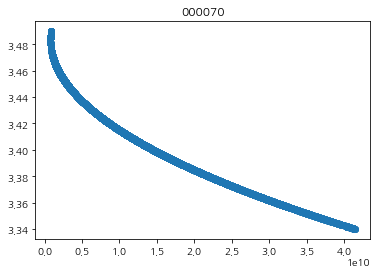

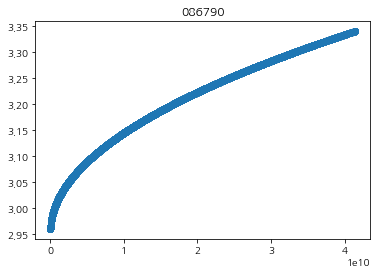

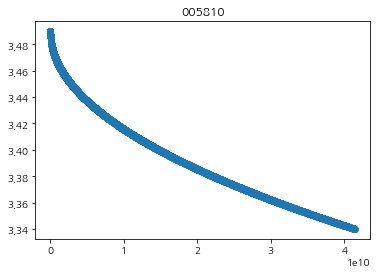

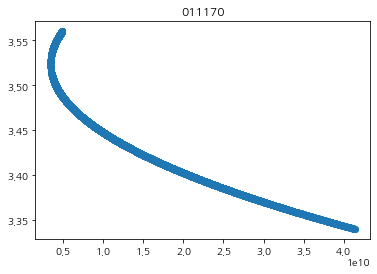

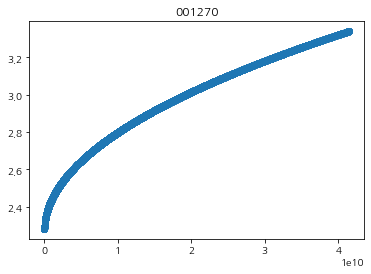

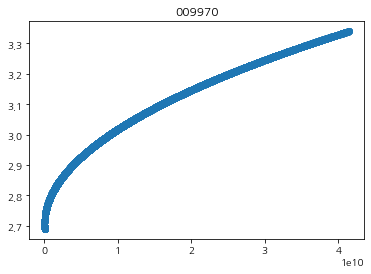

In [62]:
# 일반화
for i in range(len(df_pf)):
    stock_return = df_pf.iloc[i]["E_return"]
    stock_std = df_pf.iloc[i]["std"]
    stock_corr = df_pf.iloc[i]["corr"]
    tmp_return = []
    tmp_std = []
    for x in range(10000):
        weights = np.random.random(2)
        weights /= np.sum(weights)  # 가중치 합 1

        p_return = portfolio_return(weights[0], input_item[0], stock_return)
        p_std = portfolio_std(weights[0], input_item[1], stock_std, stock_corr)

        tmp_return.append(p_return)
        tmp_std.append(p_std)
        
    plt.title(df_pf.iloc[i]["Ticker"])
    plt.scatter(tmp_std, tmp_return)
    plt.show()

# 최소분산포트폴리오(MVP; minimum variance portfolio)

In [63]:
df_pf

,Ticker,Name,corr,total_rank,E_return,std
0,375500,DL이앤씨,0.378423,234,3.29,9385.148532
1,005490,POSCO홀딩스,0.311483,249,3.73,54733.648161
2,017940,E1,-0.459668,275,2.60,8970.860639
3,071050,한국금융지주,0.689742,378,3.44,17163.889742
4,000070,삼양홀딩스,-0.197284,389,3.49,29660.235789
5,086790,하나금융지주,0.292867,398,2.96,8021.288552
6,005810,풍산홀딩스,-0.301014,417,3.49,5577.844869
7,011170,롯데케미칼,-0.288163,491,3.56,69682.934236
8,001270,부국증권,0.375656,493,2.28,3012.984780
9,009970,영원무역홀딩스,-0.585296,498,2.69,8907.247632


In [64]:
# MVP 조건 만족 하는 종목 추출
# ρ < σ2 / σ1. 단, σ1 > σ2

delete_item = []
for i in range(len(df_pf)):
    stock_ticker = df_pf.iloc[i]["Ticker"]
    stock_std = df_pf.iloc[i]["std"]
    stock_corr = df_pf.iloc[i]["corr"]
    if input_item[1] > stock_std:
        if stock_corr < (stock_std / input_item[1]):
            print(f"{stock_ticker}: 포트폴리오분산의 감소효과 조건 만족")
        else:
            print(f"{stock_ticker}: 포트폴리오분산의 감소효과 조건 만족 못함")
            delete_item.append(stock_ticker)
    else:
        if stock_corr < (input_item[1] / stock_std):
            print(f"{stock_ticker}: 포트폴리오분산의 감소효과 조건 만족")
        else:
            print(f"{stock_ticker}: 포트폴리오분산의 감소효과 조건 만족 못함")
            delete_item.append(stock_ticker)
delete_item

375500: 포트폴리오분산의 감소효과 조건 만족 못함
005490: 포트폴리오분산의 감소효과 조건 만족 못함
017940: 포트폴리오분산의 감소효과 조건 만족
071050: 포트폴리오분산의 감소효과 조건 만족 못함
000070: 포트폴리오분산의 감소효과 조건 만족
086790: 포트폴리오분산의 감소효과 조건 만족 못함
005810: 포트폴리오분산의 감소효과 조건 만족
011170: 포트폴리오분산의 감소효과 조건 만족
001270: 포트폴리오분산의 감소효과 조건 만족 못함
009970: 포트폴리오분산의 감소효과 조건 만족


['375500', '005490', '071050', '086790', '001270']

In [65]:
df_top3 = df_pf.loc[~df_pf["Ticker"].isin(delete_item)].reset_index(drop=True).head(3)
df_top3

,Ticker,Name,corr,total_rank,E_return,std
0,017940,E1,-0.459668,275,2.60,8970.860639
1,000070,삼양홀딩스,-0.197284,389,3.49,29660.235789
2,005810,풍산홀딩스,-0.301014,417,3.49,5577.844869


In [66]:
# 최소분산포트폴리오 구성비 구하기
# w2 = 1 - w1

def get_mvp_weight(std1, std2, corr):
    numerator = (std2 ** 2) - (corr * std1 * std2)
    denominator = (std1 ** 2) + (std2 ** 2) - (2 * corr * std1 * std2)
    w1 = numerator / denominator
    
    return w1

In [67]:
df_top3.iloc[0]["Ticker"]

'017940'

In [68]:
w1 = get_mvp_weight(input_item[1], df_top3.iloc[0]["std"], df_top3.iloc[0]["corr"])
print(w1, 1 - w1)

0.021292661945456537 0.9787073380545435


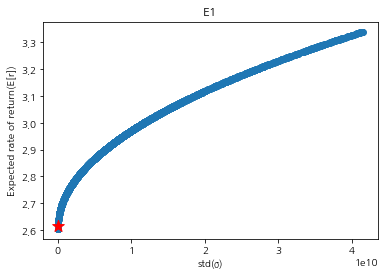

LG화학 & E1로 구성된 MVP 연간 기대수익률: 2.62%
LG화학의 연간 기대수익률: 3.34%
LG화학의 보유 비중: 0.02
E1의 보유 비중: 0.98


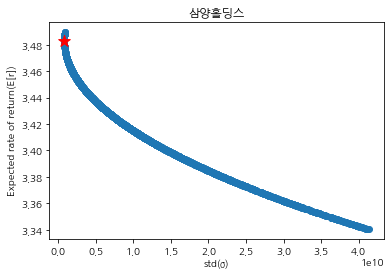

LG화학 & 삼양홀딩스로 구성된 MVP 연간 기대수익률: 3.48%
LG화학의 연간 기대수익률: 3.34%
LG화학의 보유 비중: 0.05
삼양홀딩스의 보유 비중: 0.95


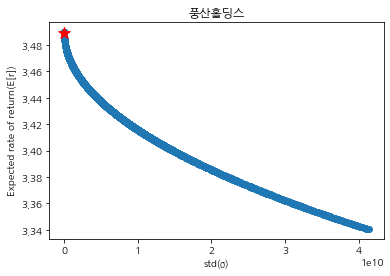

LG화학 & 풍산홀딩스로 구성된 MVP 연간 기대수익률: 3.49%
LG화학의 연간 기대수익률: 3.34%
LG화학의 보유 비중: 0.01
풍산홀딩스의 보유 비중: 0.99


In [71]:
# w1, 즉 가중치의 첫번째 것이 입력받은 주식의 가중치이다.

for i in range(len(df_top3)):
    top3_name = df_top3.iloc[i]["Name"]
    top3_return = df_top3.iloc[i]["E_return"]
    top3_std = df_top3.iloc[i]["std"]
    top3_corr = df_top3.iloc[i]["corr"]
    tmp_return_2 = []
    tmp_std_2 = []
    for x in range(2500):
        weights_2 = np.random.random(2)
        weights_2 /= np.sum(weights_2)  # 가중치 합 1
        mvp_weight = get_mvp_weight(input_item[1], top3_std, top3_corr)
        
        p_return_2 = portfolio_return(weights_2[0], input_item[0], top3_return)
        p_std_2 = portfolio_std(weights_2[0], input_item[1], top3_std, top3_corr)
        
        mvp_return = portfolio_return(mvp_weight, input_item[0], top3_return)
        mvp_std = portfolio_std(mvp_weight, input_item[1], top3_std, top3_corr)
        
        tmp_return_2.append(p_return_2)
        tmp_std_2.append(p_std_2)
        
        
    plt.title(top3_name)
    plt.scatter(tmp_std_2, tmp_return_2)
    plt.scatter(mvp_std, mvp_return,c='r', marker='*', s=150)
    plt.xlabel("std(σ)")
    plt.ylabel("Expected rate of return(E[r])")
    plt.show()
    print(f"{item_info[0]} & {top3_name}로 구성된 MVP 연간 기대수익률: {np.round(mvp_return, 2)}%")
    print(f"{item_info[0]}의 연간 기대수익률: {input_item[0]}%")
    print(f"{item_info[0]}의 보유 비중: {np.round(mvp_weight, 2)}")
    print(f"{top3_name}의 보유 비중: {np.round(1 - mvp_weight, 2)}")